In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
import cmocean

## set plotting specs
sns.set(rc={"axes.facecolor": "white", "axes.grid": False})

## bump up DPI
mpl.rcParams["figure.dpi"] = 100

In [7]:
def Te_struct(h, dT, dz, ds):
    """structure of thermocline"""
    ds_nondim = (h - ds) / dz
    # print(dT * np.tanh(ds_nondim))
    return dT * np.tanh(ds_nondim)


def get_Te(h=np.linspace(40, 60), dT=10, dz1=5, ds=50, k=1 / 2):
    """return function to get entrainment temperature as a function of thermocline depth"""

    ## get anomaly at depth
    dT1 = dT / 50 * dz1

    ## get structure of top of thermocline
    dT2 = dT1 * k
    dz2 = dz1 * k

    if type(h) in [float, int]:
        dT, dz = (dT1, dz1) if (h > ds) else (dT2, dz2)
        Te = Te_struct(h, dT, dz, ds)

    else:
        ## empty array to hold results
        Te = np.zeros(len(h), dtype=float)

        ## find indices below ds
        is_below = h > ds

        ## compute Te
        Te[is_below] = Te_struct(h[is_below], dT1, dz1, ds)
        Te[~is_below] = Te_struct(h[~is_below], dT2, dz2, ds)

    return Te

In [25]:
np.tanh(-2)

np.float64(-0.9640275800758169)

In [28]:
Te[h > 50]

array([0.04079368, 0.12184064, 0.20129477, 0.27818549, 0.35166893,
       0.42105987, 0.48584895, 0.54570541, 0.60046723, 0.65012212,
       0.69478267, 0.73465916, 0.77003273, 0.80123089, 0.82860643,
       0.85252036, 0.87332881, 0.89137347, 0.90697526, 0.92043047,
       0.9320089 , 0.94195343, 0.95048074, 0.95778257, 0.96402758])

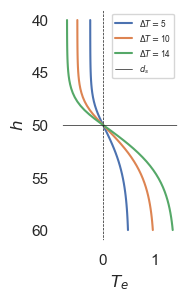

In [23]:
## get h values
h = np.linspace(40, 60)

## get profiles
dT_vals = np.arange(5, 15)
Te_profiles = np.stack([get_Te(dT=dT, h=h) for dT in dT_vals], axis=1)

## specify dT/dz ratio
Te = get_Te(dT=10, h=h)

fig, ax = plt.subplots(figsize=(1.5, 3))
ax.plot(Te_profiles[:, 0], h, label=f"$\\Delta T=${dT_vals[0]}")
ax.plot(Te_profiles[:, 5], h, label=f"$\\Delta T=${dT_vals[5]}")
ax.plot(Te_profiles[:, -1], h, label=f"$\\Delta T=${dT_vals[-1]}")
ax.axhline(50, ls="-", c="k", lw=0.5, label=r"$d_s$")
ax.set_ylim(ax.get_ylim()[::-1])
ax.axvline(0, ls="--", c="k", lw=0.5)
ax.set_xlabel(r"$T_e$")
ax.set_ylabel(r"$h$")
ax.legend(prop=dict(size=6))
plt.show()

In [10]:
Te_profiles.shape

(50, 10)